<a href="https://colab.research.google.com/github/Emmaculate2020/Fedha-Solutions-Project/blob/master/Copy_of_Fedha_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DEFINING THE ANALYTIC QUESTION

###a). Specifying the analytic question

As a data science team (Fedha Solutions), we have been tasked by MoneyPlus,a Kenyan lending company based in Nairobi, to build a model that can accurately predict the loan interest rate category (either 1, 2, or 3) that will be assigned to each loan.



###b). Defining the metrics of success

Our success will be measured by:

* Creating a predictive model with the highest accuracy and F1 scores without overfitting.
* Providing effective recommendations on groupings of customers according to the loan interest rate categories.

###c). Understanding the Context

MoneyPlus is a Kenyan lending company based in Nairobi that is building up a credit risk system to effectively issue loans. It wants to venture into a risk-based pricing methodology that looks at factors such as a consumer’s credit score, loan amount, annual income, employment status, and tenure.



###d). Recording the Experimental Design

Below is the expected workflow of our Analysis

1.   Data Cleaning and Preparation

2.   Perform EDA

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

3.  Spliting dataset into testing and training data.
4.  Build a classification model.
5.  Make predictions using the model.
6.  Assess accuracy of the models.
7.  Make conclusions & Challenge the solution.


###e). Data Relevance

The data provided was relevant to answer the analytic question.

Below is the link to datasets and the descriptions of our datasets columns:

https://docs.google.com/document/d/1ZWyRcQZHlbRz1PoycPMK5aH3vxjg1H7UD90BwCff_do/edit




## Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Load the Dataset

In [ ]:
train = pd.read_csv('/content/train_fNxu4vz.csv')
test = pd.read_csv("/content/test_fjtUOL8.csv")

## Checking the data

In [ ]:
# Preview the first 5 rows of our dataset

train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [ ]:
# Preview the last 5 rows of our dataset

train.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,"9,250",10+ years,Rent,NaN,VERIFIED - income,credit_card,19.44,1,NaN,5,9,Female,2


In [ ]:
test.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male
109540,10273850,"15,000",2 years,Mortgage,137000.0,not verified,medical,8.66,1,60.0,8,17,Male


In [ ]:
# Checking the shape of our data

print("Training dataset shape",train.shape)
print("Testing dataset shape", test.shape)

Training dataset shape (164309, 14)
Testing dataset shape (109541, 13)


Our train dataset has 164309 rows and 14 columns while our test dataset has 109541 rows and 13 columns

In [ ]:
# Checking for infomation about a dataset

print("Train dataset information",train.info())
print("\n")
print("test dataset information",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
# Describing our data

print("Train dataset description",pd.DataFrame(train.describe()))
print("\n")
print("Test dataset description",pd.DataFrame(test.describe()))

Train dataset description             Loan_ID  Annual_Income  Debt_To_Income  Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  Total_Accounts  Interest_Rate
count  1.643090e+05   1.392070e+05   164309.000000       164309.000000             75930.000000         164309.000000   164309.000000  164309.000000
mean   1.008216e+07   7.333116e+04       17.207189            0.781698                34.229356             11.193818       25.067665       2.158951
std    4.743207e+04   6.037750e+04        7.845083            1.034747                21.761180              4.991813       11.583067       0.738364
min    1.000000e+07   4.000000e+03        0.000000            0.000000                 0.000000              0.000000        2.000000       1.000000
25%    1.004108e+07   4.500000e+04       11.370000            0.000000                16.000000              8.000000       17.000000       2.000000
50%    1.008216e+07   6.300000e+04       16.840000            0.000000          

In [ ]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate'], dtype='object')

In [ ]:
#checking for unique values in the different columns
col = ['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate']

print("Train Dataset")
for i, col in enumerate(col):
        print("\n")
        print(col,train[col].unique())


Train Dataset


Loan_Amount_Requested ['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']


Length_Employed ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


Home_Owner ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']


Annual_Income [68000.      nan 75566.4 ... 51024.  28721.4 24864. ]


Income_Verified ['not verified' 'VERIFIED - income' 'VERIFIED - income source']


Purpose_Of_Loan ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']


Debt_To_Income [18.37 14.93 15.88 ... 38.03 39.04 35.06]


Inquiries_Last_6Mo [0 3 1 2 4 5 6 7 8]


Months_Since_Deliquency [ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  39.  30.  32.  18.  24.  47.  66.  19.  76.   4.  29.
  45.  38.  

In [ ]:
cols = ['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender']

print("Test Dataset")
for i, cols in enumerate(cols):
        print("\n")
        print(cols, test[cols].unique())


Test Dataset


Loan_Amount_Requested ['27,500' '26,000' '6,075' ... '24,050' '34,425' '29,875']


Length_Employed ['10+ years' '< 1 year' '6 years' '8 years' '1 year' '3 years' '2 years'
 nan '4 years' '7 years' '5 years' '9 years']


Home_Owner ['Mortgage' nan 'Rent' 'Own' 'Other' 'None']


Annual_Income [129000. 110000.  75000. ... 204600.  49680.  74760.]


Income_Verified ['VERIFIED - income' 'not verified' 'VERIFIED - income source']


Purpose_Of_Loan ['debt_consolidation' 'credit_card' 'home_improvement' 'other'
 'small_business' 'vacation' 'wedding' 'major_purchase' 'car' 'house'
 'medical' 'renewable_energy' 'moving' 'educational']


Debt_To_Income [12.87 11.37  6.83 ... 35.86 38.78 38.76]


Inquiries_Last_6Mo [0 2 1 3 6 4 5 7 8]


Months_Since_Deliquency [ 68.  nan  26.  18.  22.  65.  47.  45.  49.  66.  13.  69.  38.  53.
  25.  52.  10.  12.  60.  74.   1.  21.   5.  32.  72.   6.  19.   7.
  20.  17.  44.  55.  37.  58.   8.  15.  30.  33.   9.  75.   3.  29.
  14.  79.  8

## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## Tidying the Dataset

In [ ]:
# We start by checking for null values in our dataset

train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [ ]:
# Remove whitespaces and other operators from Length_Employed column

train['Length_Employed'].unique()

train['Length_Employed'] = train['Length_Employed'].str.strip().str.replace("<", " ")
train['Length_Employed'] = train['Length_Employed'].str.strip().str.replace("+", " ")
train['Length_Employed'] = train['Length_Employed'].str.strip().str.replace(" year", " ")
train['Length_Employed'] = train['Length_Employed'].str.strip().str.replace("years", " ")
train['Length_Employed'] = train['Length_Employed'].str.strip().str.replace("s", " ")

test['Length_Employed'] = test['Length_Employed'].str.strip().str.replace("<", " ")
test['Length_Employed'] = test['Length_Employed'].str.strip().str.replace("+", " ")
test['Length_Employed'] = test['Length_Employed'].str.strip().str.replace(" year", " ")
test['Length_Employed'] = test['Length_Employed'].str.strip().str.replace("years", " ")
test['Length_Employed'] = test['Length_Employed'].str.strip().str.replace("s", " ")

test['Length_Employed'] = test['Length_Employed'].astype("float32")
train['Length_Employed'] = train['Length_Employed'].astype("float32")

print(test['Length_Employed'].unique())
print(train['Length_Employed'].unique())

[10.  1.  6.  8.  3.  2. nan  4.  7.  5.  9.]
[ 1.  4.  7.  8.  2. 10. nan  6.  9.  3.  5.]


In [ ]:
# Remove whitespaces, change from uppercase to lowercase

train.columns = train.columns.str.strip().str.replace("", "").str.lower()
test.columns = test.columns.str.strip().str.replace("", "").str.lower()

category = ["home_owner", "income_verified", "purpose_of_loan", "gender"]

for i, c in enumerate(category):
  train[c] = train[c].str.strip().str.replace("", "").str.lower()
  
for i, c in enumerate(category):
  test[c] = test[c].str.strip().str.replace("", "").str.lower()


In [ ]:
# Convert loan requested column to float

train['loan_amount_requested'] = train['loan_amount_requested'] .str.strip().str.replace(",", " ").str.replace(" ","")
train['loan_amount_requested'] = train['loan_amount_requested'] .astype("float32")

test['loan_amount_requested'] = test['loan_amount_requested'] .str.strip().str.replace(",", " ").str.replace(" ","")
test['loan_amount_requested'] = test['loan_amount_requested'] .astype("float32")

In [ ]:
# Remove Duplicates

train.drop_duplicates()
test.drop_duplicates()
print("Train duplicates :", train.duplicated().sum())
print("Test duplicates :", test.duplicated().sum())


Train duplicates : 0
Test duplicates : 0


In [ ]:
# Drop Loan ID column

train.drop("loan_id", axis= 1, inplace = True)
test.drop("loan_id", axis= 1, inplace = True)
train.columns

Index(['loan_amount_requested', 'length_employed', 'home_owner', 'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income', 'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts', 'total_accounts', 'gender', 'interest_rate'], dtype='object')

In [ ]:
# Encoding the categorical values

train['home_owner'].unique()
train['home_owner'] = train['home_owner'].apply({'rent':0, 'mortgage':1, 'own':2, 'other':3, 'none':4 }.get)
train['gender'] = train['gender'].apply({'female':0, 'male':1 }.get)
train['income_verified'] = train['income_verified'].apply({'verified - income':0, 'not verified':1,
                                                           'verified - income source':2 }.get)
train['purpose_of_loan'] = train['purpose_of_loan'].apply({'debt_consolidation':0, 'credit_card':1, 'home_improvement':2, 
                            'other':3, 'small_business':4, 'vacation':5, 'wedding':6, 'major_purchase':7,
                             'car':8, 'house':9, 'medical':10, 'renewable_energy':11, 'moving':12,
                              'educational':13  }.get)

train.head()

test['home_owner'].unique()
test['home_owner'] = test['home_owner'].apply({'rent':0, 'mortgage':1, 'own':2, 'other':3, 'none':4 }.get)
test['gender'] = test['gender'].apply({'female':0, 'male':1 }.get)
test['income_verified'] = test['income_verified'].apply({'verified - income':0, 'not verified':1,
                                                           'verified - income source':2 }.get)
test['purpose_of_loan'] = test['purpose_of_loan'].apply({'debt_consolidation':0, 'credit_card':1, 'home_improvement':2, 
                            'other':3, 'small_business':4, 'vacation':5, 'wedding':6, 'major_purchase':7,
                             'car':8, 'house':9, 'medical':10, 'renewable_energy':11, 'moving':12,
                              'educational':13  }.get)

test.head()

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender
0,27500.0,10.0,1.0,129000.0,0,0,12.87,0,68.0,10,37,1
1,26000.0,10.0,NaN,110000.0,1,1,11.37,0,NaN,6,23,1
2,6075.0,1.0,0.0,75000.0,0,0,6.83,2,NaN,5,20,1
3,12000.0,10.0,1.0,73000.0,2,0,7.76,0,NaN,6,8,1
4,35000.0,1.0,1.0,156000.0,1,0,9.62,0,26.0,9,21,1


In [ ]:
!pip install fancyimpute

In [ ]:
# Deal with missing values using fancyimpute

from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(train)

In [ ]:
# Deal with missing values using fancyimpute

from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
testdatafill = mice_impute.fit_transform(test)

In [ ]:
# Convert the array formed into a dataframe

train_new = pd.DataFrame(traindatafill, columns = ['loan_amount_requested', 'length_employed', 'home_owner', 'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income', 'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts', 'total_accounts', 'gender', 'interest_rate'])
train_new.head()

test_new = pd.DataFrame(testdatafill, columns = ['loan_amount_requested', 'length_employed', 'home_owner', 'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income', 'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts', 'total_accounts', 'gender'])
test_new.head()


,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender
0,27500.0,10.0,1.000000,129000.0,0.0,0.0,12.87,0.0,68.000000,10.0,37.0,1.0
1,26000.0,10.0,0.777183,110000.0,1.0,1.0,11.37,0.0,33.183611,6.0,23.0,1.0
2,6075.0,1.0,0.000000,75000.0,0.0,0.0,6.83,2.0,36.956027,5.0,20.0,1.0
3,12000.0,10.0,1.000000,73000.0,2.0,0.0,7.76,0.0,34.520888,6.0,8.0,1.0
4,35000.0,1.0,1.000000,156000.0,1.0,0.0,9.62,0.0,26.000000,9.0,21.0,1.0


In [ ]:
train_new['length_employed'] = round(train_new['length_employed'])
train_new['length_employed'].value_counts()

10.0    52916
1.0     23227
2.0     14620
3.0     12974
5.0     12505
6.0     11956
7.0     11565
4.0      9893
8.0      8350
9.0      6303
Name: length_employed, dtype: int64

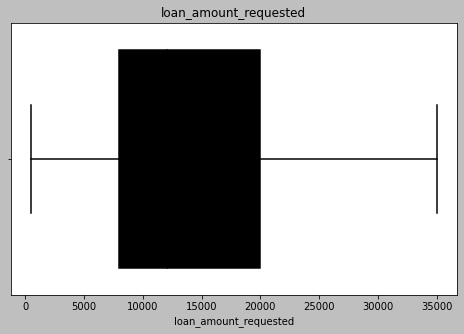

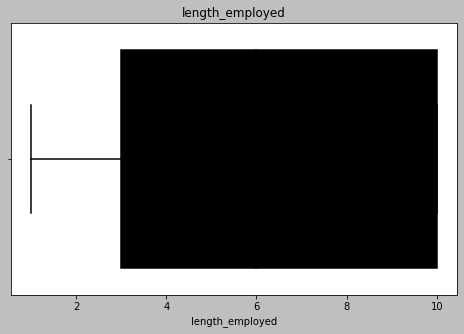

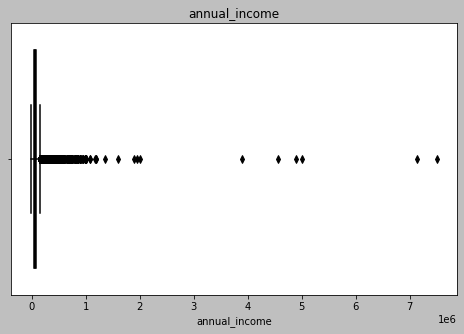

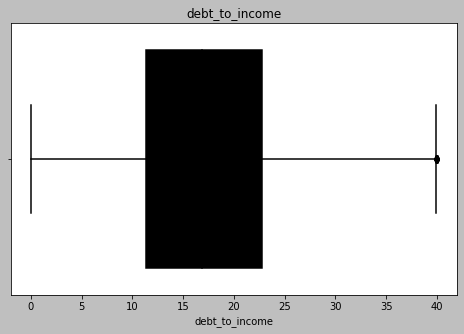

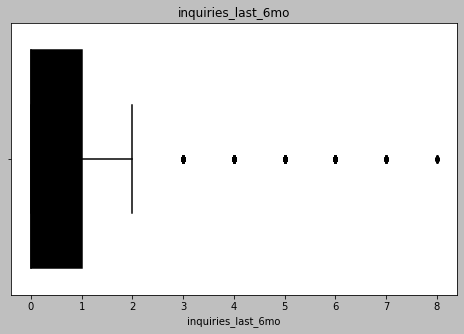

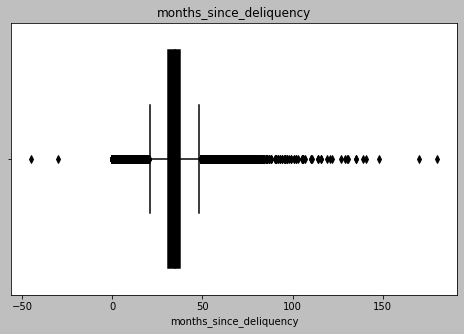

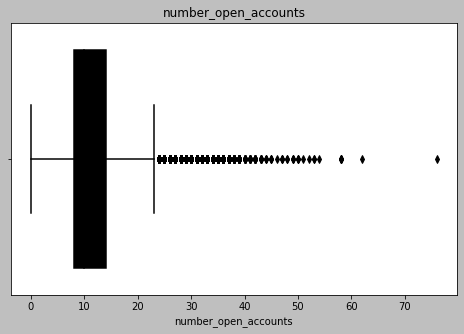

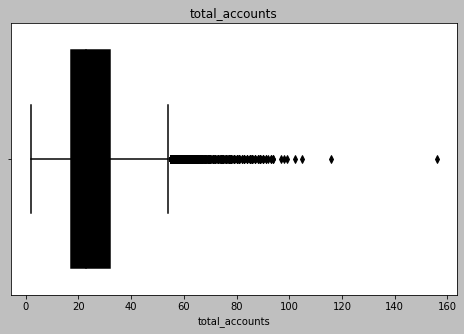

In [ ]:
# Check for outliers for train dataset using Boxplots

columns = ['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']

for i, j in enumerate(columns):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(train_new[j])

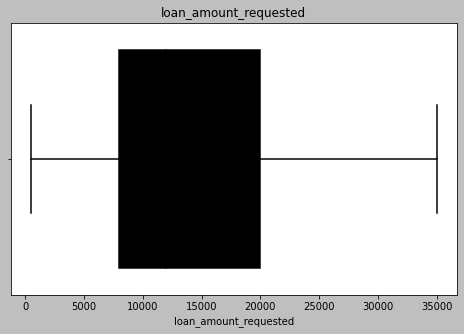

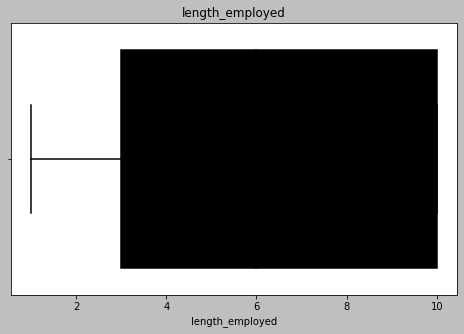

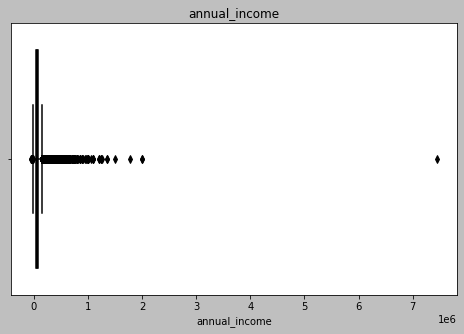

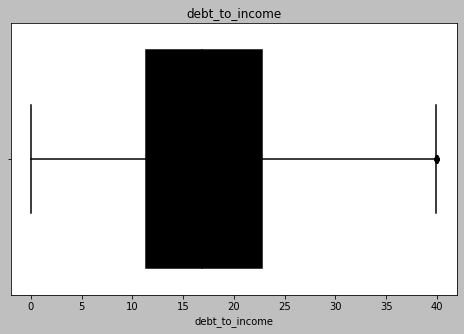

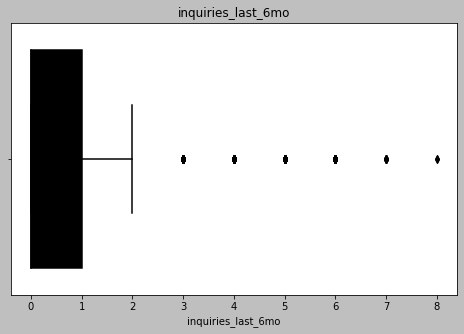

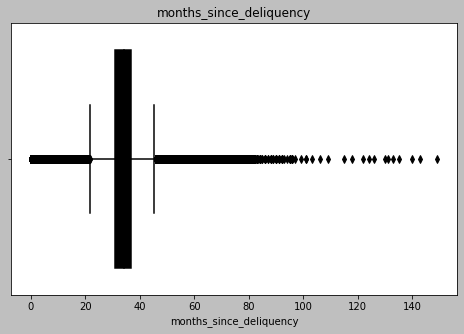

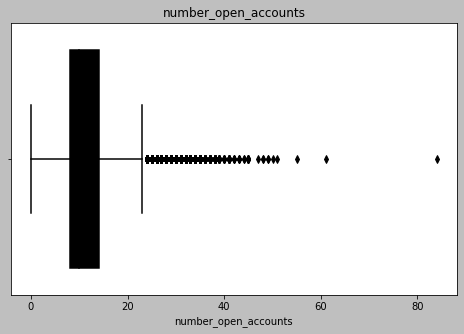

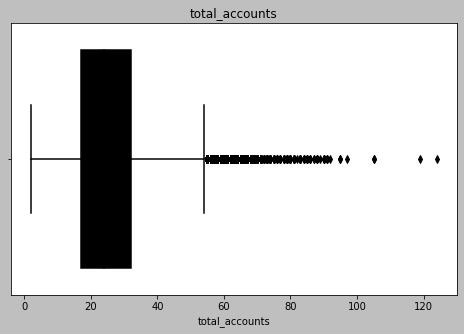

In [ ]:
# Check for outliers for test dataset using Boxplots

columns = ['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']

for i, j in enumerate(columns):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(test_new[j])

In [ ]:
# Remove Outliers in Train Numerical Values

columns = train_new[['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
train_num = train_new[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {train_new.shape}")
print(f"New dataframe size: {train_num.shape}")


[[0.8874035  1.48170111 0.09450469 ... 0.22185699 0.43948447 0.95550677]
 [1.88975596 0.60653952 0.60287103 ... 1.18873669 0.16150137 0.09217493]
 [1.25282047 0.26862208 0.0392964  ... 0.17116948 0.16150137 0.7828404 ]
 ...
 [0.71248184 1.14378367 0.48249753 ... 0.06027357 1.16314444 0.42582417]
 [0.52516531 0.60653952 0.22222916 ... 0.891853   0.96281582 3.18848604]
 [0.61572486 1.14378367 0.56003405 ... 0.31765716 1.24079892 1.38717269]]
Previous dataframe size : (164309, 13)
New dataframe size: (155910, 13)


In [ ]:
# Remove Outliers in Test Numerical Values

columns = test_new[['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
test_num = test_new[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {test_new.shape}")
print(f"New dataframe size: {test_num.shape}")



[[1.58335939 1.14174804 1.06227273 ... 2.27525828 0.2374176  1.02861949]
 [1.40263157 1.14174804 0.69852388 ... 0.06821103 1.04610434 0.17832017]
 [0.99803625 1.4892422  0.02846022 ... 0.18570787 1.24827602 0.4369501 ]
 ...
 [1.48901348 0.3199132  0.6827645  ... 0.15569899 0.2374176  1.21283989]
 [1.47395283 0.02758095 0.8330502  ... 0.23968221 1.24827602 1.64388977]
 [0.07729426 1.19690995 1.21543014 ... 1.73678329 0.64176097 0.69558003]]
Previous dataframe size : (109541, 12)
New dataframe size: (103368, 12)


In [ ]:
# Export the cleaned dataset

test_num.to_csv('test_clean.csv')
train_num.to_csv('train_clean.csv')


In [ ]:
# Renaming our dataset 

df = train_num.copy()
df.head(3)

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender,interest_rate
0,7000.0,1.0,0.0,68000.00000,1.0,8.0,18.37,0.0,38.017313,9.0,14.0,0.0,1.0
1,30000.0,4.0,1.0,107436.32745,0.0,0.0,14.93,0.0,17.000000,12.0,24.0,0.0,3.0
2,24725.0,7.0,1.0,75566.40000,2.0,0.0,15.88,0.0,32.161367,12.0,16.0,1.0,3.0


##Exploratory Data Analysis

In [ ]:
train_num['home_owner'].value_counts()

1.000000    65897
0.000000    53986
2.000000    11877
3.000000       49
4.000000       10
            ...  
0.840970        1
0.720207        1
0.858767        1
0.639214        1
0.755570        1
Name: home_owner, Length: 24096, dtype: int64

In [ ]:
# Reverse encode the categorical variables 

train_num['home_owner'] = train_num['home_owner'].apply({0:'rent', 1:'mortgage', 2: 'Own', 3:'other', 4:'none' }.get)
train_num['gender'] = train_num['gender'].apply({0:'female', 1:'male' }.get)
train_num['income_verified'] = train_num['income_verified'].apply({0:'verified - income', 1:'not verified',
                                                           2:'verified - income source' }.get)
train_num['purpose_of_loan'] = train_num['purpose_of_loan'].apply({0:'debt_consolidation', 1:'credit_card', 2:'home_improvement', 
                            3:'other', 4:'small_business', 5:'vacation', 6:'wedding', 7:'major_purchase',
                             8:'car', 9:'house', 10:'medical', 11:'renewable_energy', 12:'moving',
                              13:'educational' }.get)
train_num.head()

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender,interest_rate
0,7000.0,1.0,rent,68000.00000,not verified,car,18.37,0.0,38.017313,9.0,14.0,female,1.0
1,30000.0,4.0,mortgage,107436.32745,verified - income,debt_consolidation,14.93,0.0,17.000000,12.0,24.0,female,3.0
2,24725.0,7.0,mortgage,75566.40000,verified - income source,debt_consolidation,15.88,0.0,32.161367,12.0,16.0,male,3.0
3,16000.0,1.0,None,56160.00000,verified - income source,debt_consolidation,14.34,3.0,34.590480,16.0,22.0,male,3.0
4,17000.0,8.0,Own,96000.00000,verified - income source,debt_consolidation,22.17,1.0,33.361076,19.0,30.0,female,1.0


In [ ]:
# Export

train_num.to_csv('train1.csv')

###Univariate Anaysis

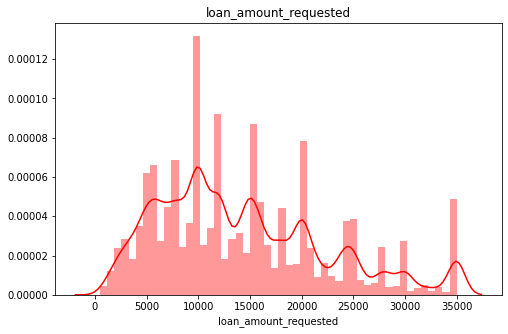

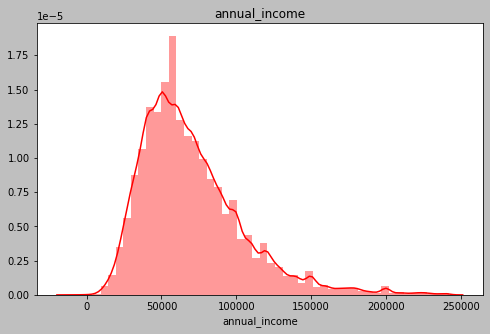

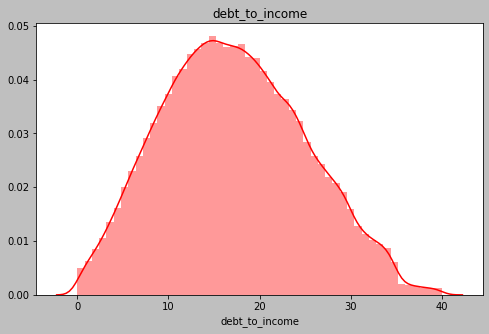

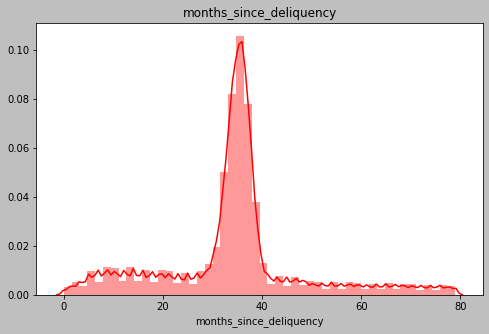

In [ ]:
# Plot histogram for numerical values
num_cols = ['loan_amount_requested','annual_income','debt_to_income','months_since_deliquency']
           
for i, j in enumerate(num_cols):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(df[j], color='red', norm_hist=True)

  plt.style.use('classic')




**Observations**

* All the continuous variables have their values skewed to the left except debt_to_income which is normally distributed.
* Most of the loan applicants earn an annual income of between 35,000 to 75,000.
* Most of the loan applicants requested for 10,000.



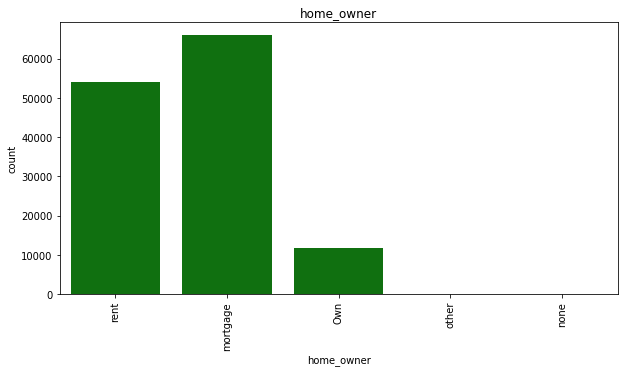

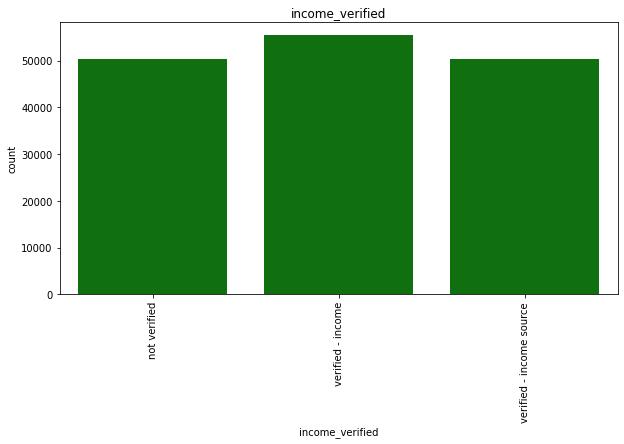

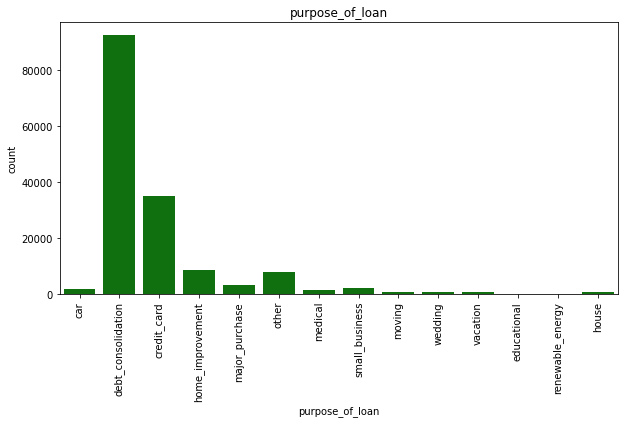

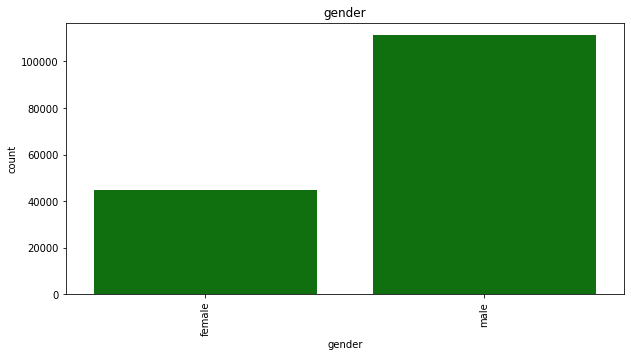

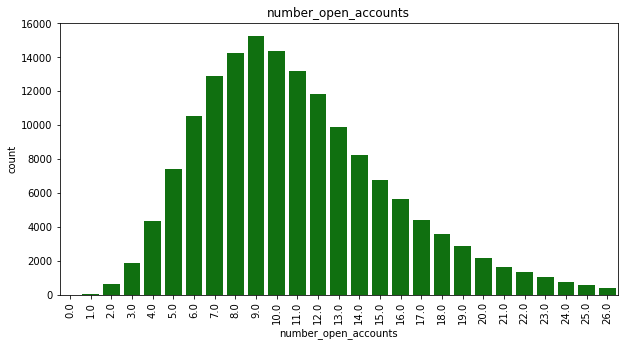

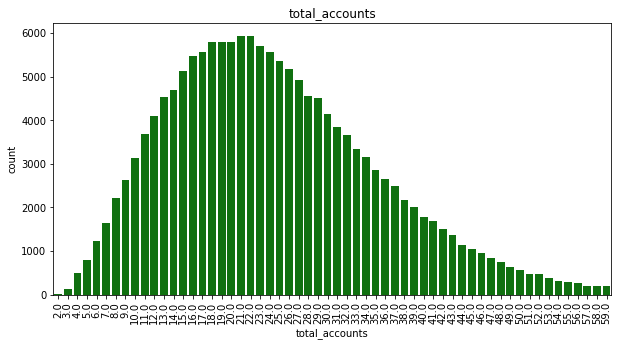

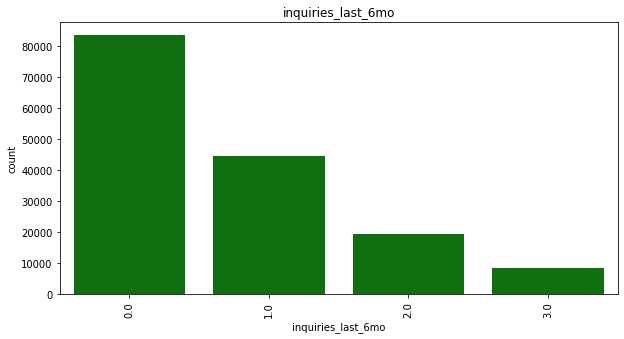

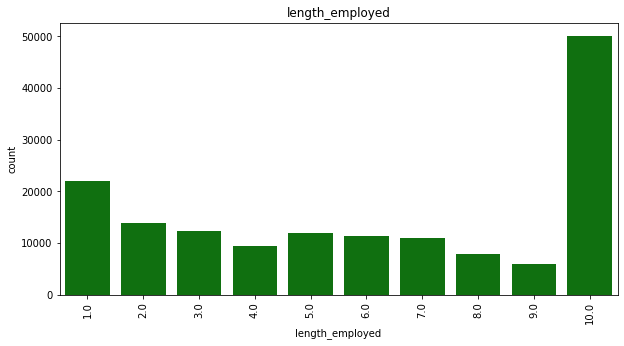

In [ ]:
# Countplot for categorical values

Categorical = ['home_owner','income_verified','purpose_of_loan','gender','number_open_accounts',
               'total_accounts','inquiries_last_6mo','length_employed']

for i,c in enumerate(Categorical):
  
  plt.figure(figsize=(10,5))
  plt.title(c)
  sns.countplot(train_num[c], color='green')
  plt.xticks(rotation = 90)


**Observations**

* Most of the loan applicants live in mortgaged houses.
* Most of the loan applicants had their income verified.
* Most of the loan applicants were applying for loans to service other loans.
* Most of the loan applicants were male.
* Most of the loan applicants were employed for 10 years and above.
* Most of the loan applicants had zero inquiries for the past six months.
* Most of the loan applicants had a range of between 7 and 12 number of open lines of credit.
* Most of the loan applicants had a range of between 12 and 30 total number of lines of credit.

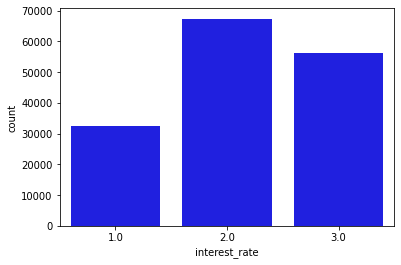

In [ ]:
#Visualize our target variable using countplot
sns.countplot(train_num['interest_rate'], color='blue')

**Observation**

Our target variable had three interest rate categories

Most of the loan applicants were grouped under category two, followed by those grouped under category three then one.

###Bivariate Analysis

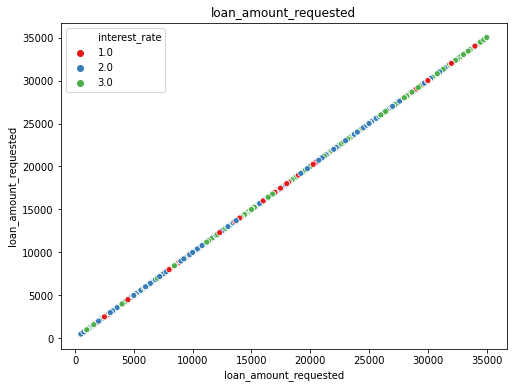

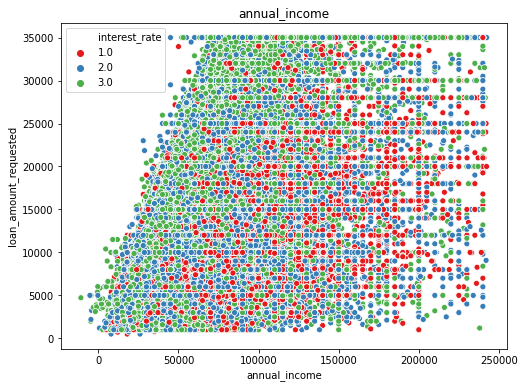

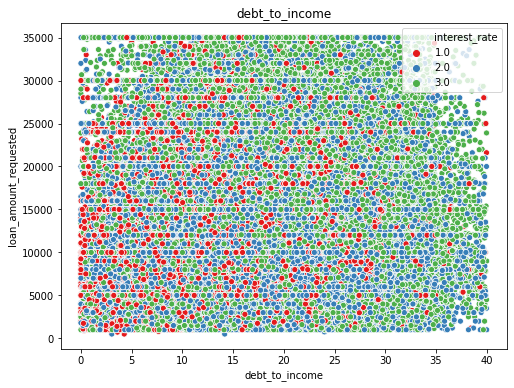

In [ ]:
# Plotting relationship between numerical columns and interest rate

num_col = ['loan_amount_requested', 'annual_income', 'debt_to_income']
for i, j in enumerate(num_col):
  plt.figure(figsize=(8,6))
  plt.title(j)
  sns.scatterplot(j,'loan_amount_requested', data = train_num,hue = 'interest_rate', palette = 'Set1')



**Observations**

* Most of the loan applicants grouped in category three had requested for higher loan amounts compared to other categories.
* Most of the loan applicants in category three earn lower annual income compared to other categories.
Most of the loan applicants.
* Most of the loan applicants in category three had a higher debt to income ratio while those in category one had a lower debt to income ratio.

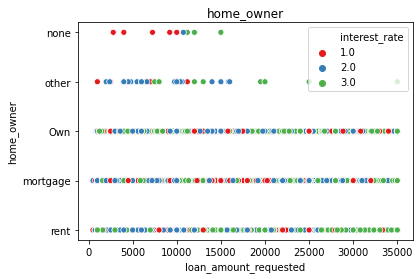

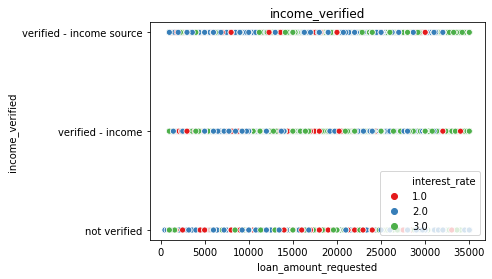

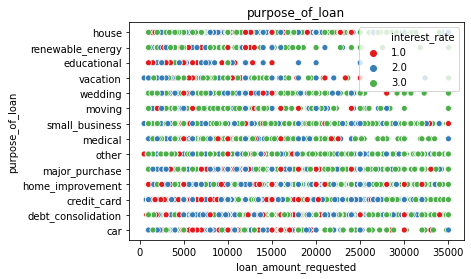

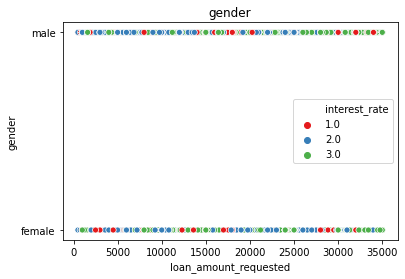

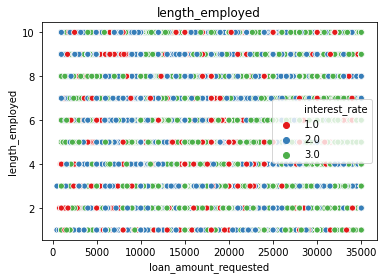

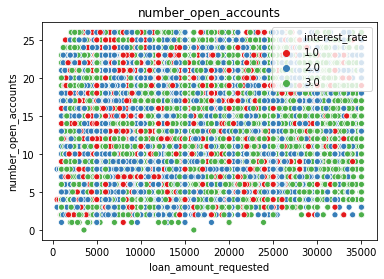

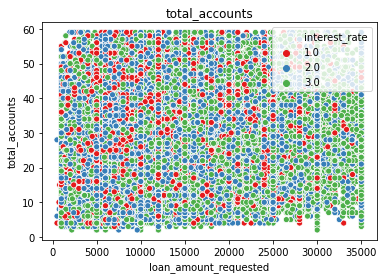

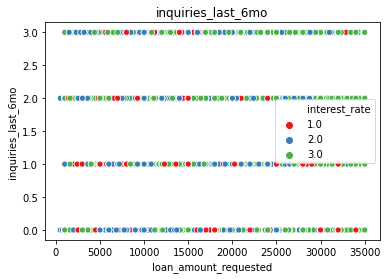

In [ ]:
# Scatterplot to show the relationship between the categorical variables and the target variables.

Categorical = ['home_owner','income_verified','purpose_of_loan','gender',
               'length_employed','number_open_accounts','total_accounts','inquiries_last_6mo']
for i, c in enumerate(Categorical):
  plt.figure(figsize=(6,4))
  plt.title(c)
  sns.scatterplot('loan_amount_requested', c , data = train_num,hue = 'interest_rate', palette = "Set1" )


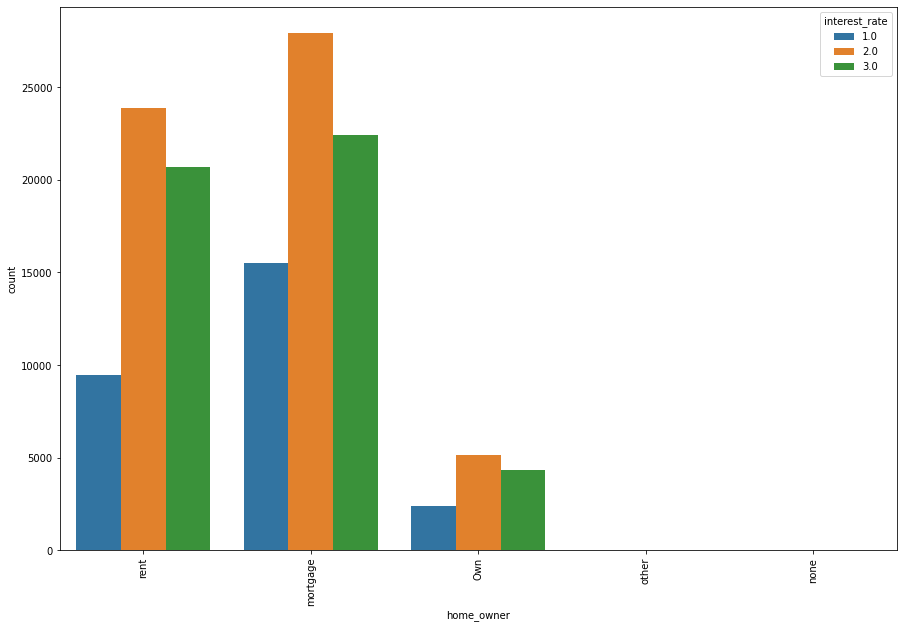

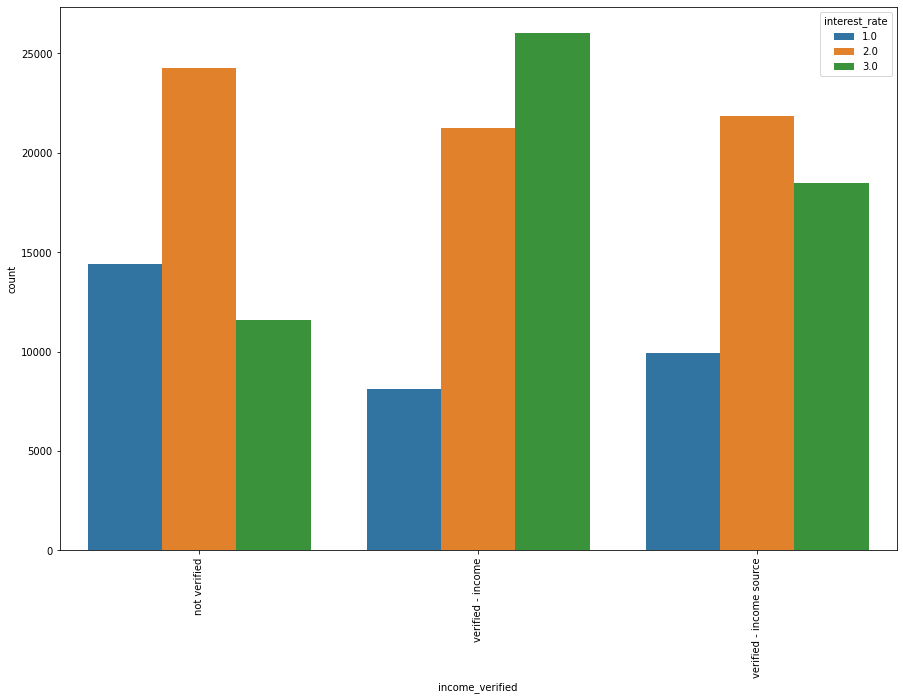

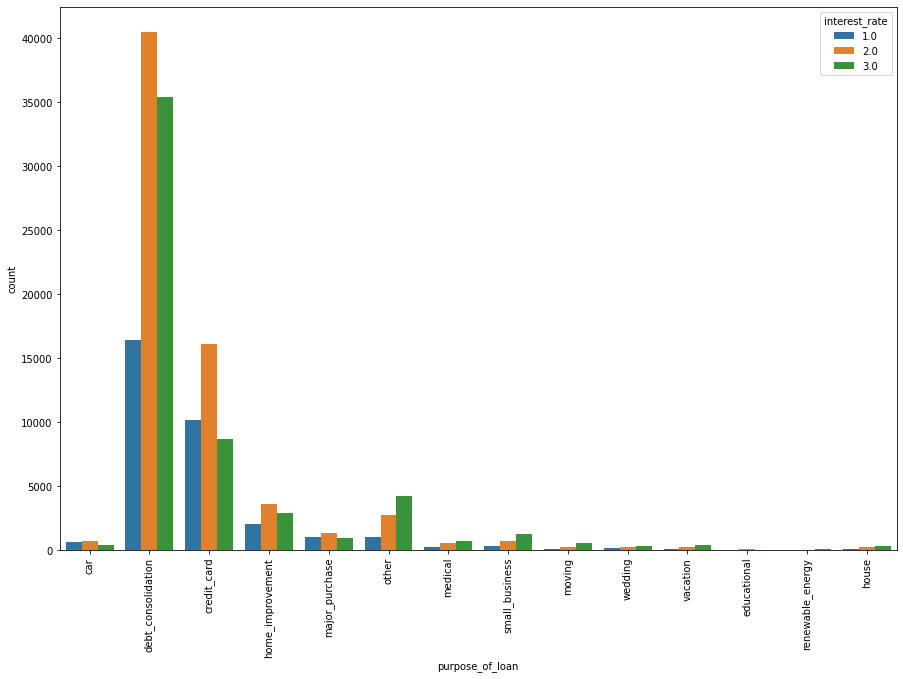

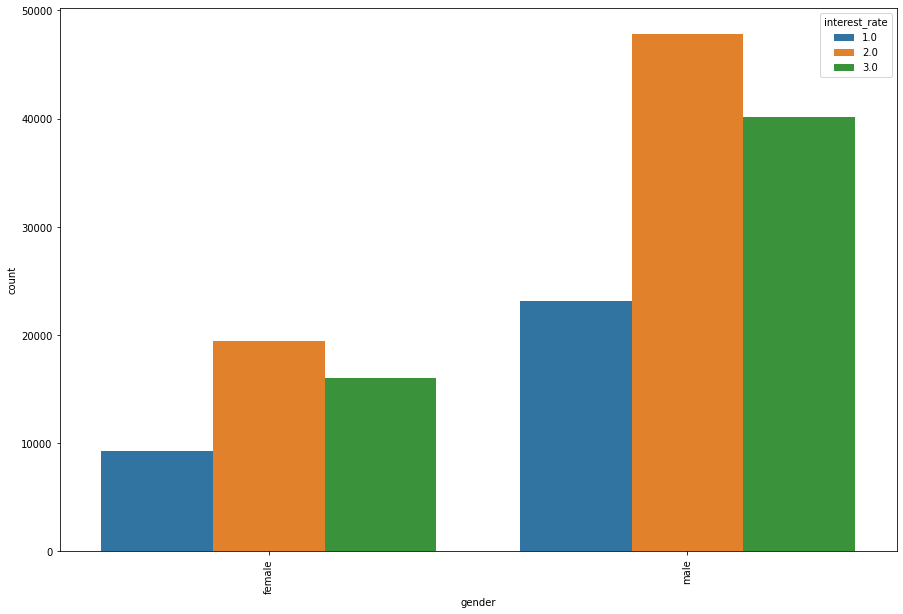

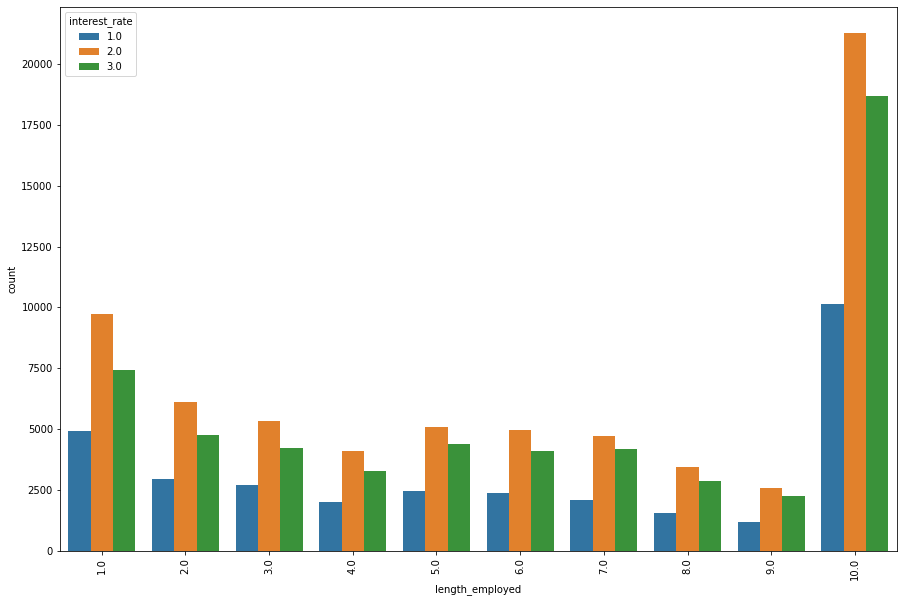

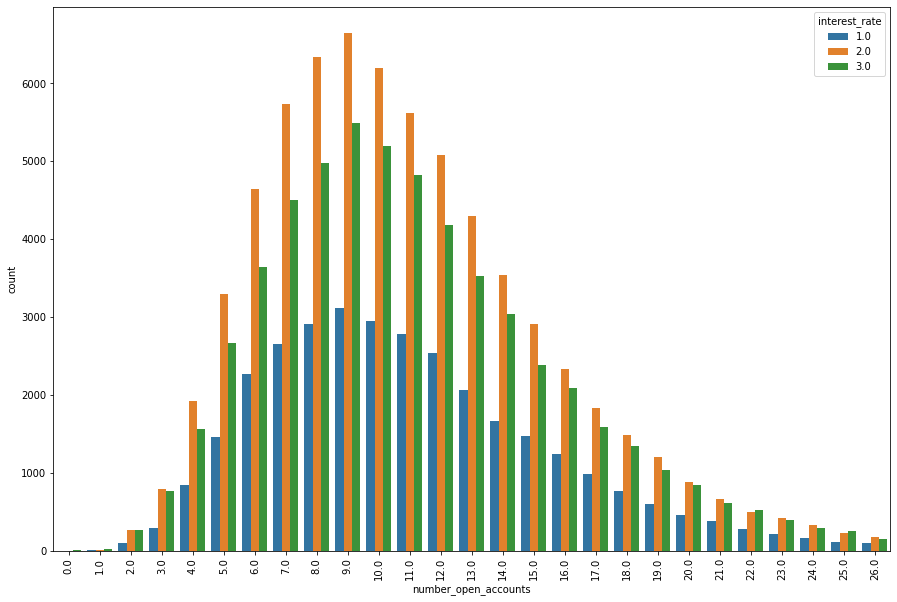

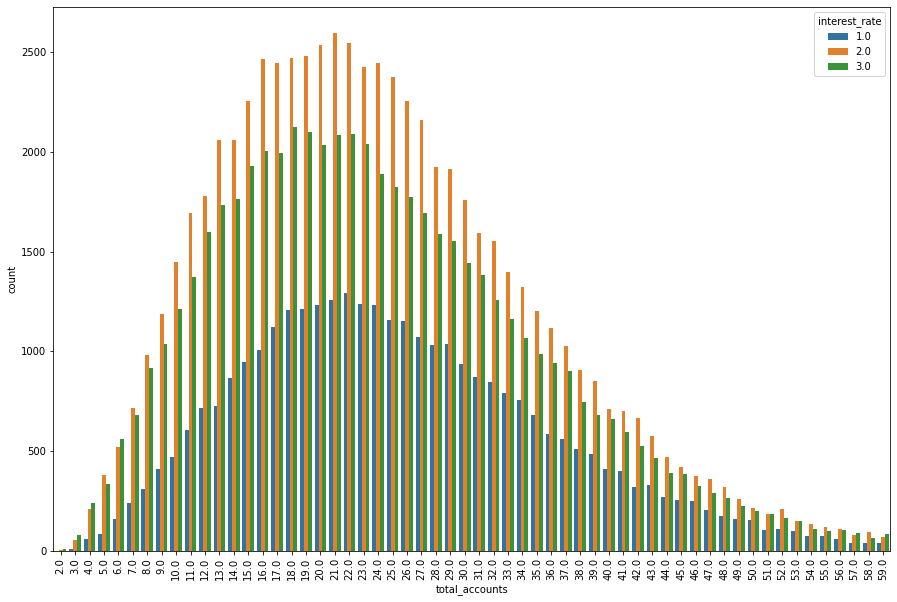

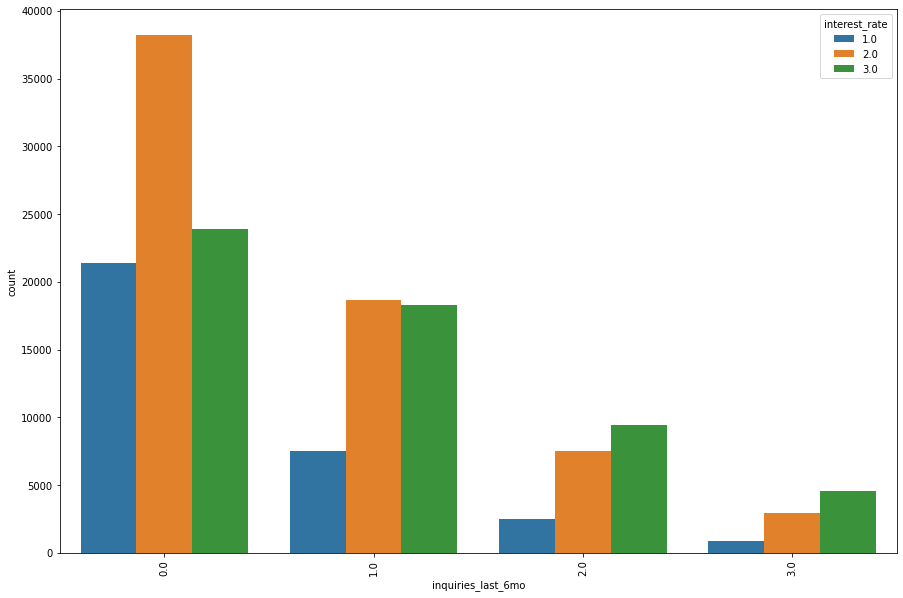

In [ ]:
# Plot relationship between categorical variables and interest rate

Categorical = ['home_owner','income_verified','purpose_of_loan','gender',
               'length_employed','number_open_accounts','total_accounts','inquiries_last_6mo']
for i,c in enumerate(Categorical):
  plt.figure(figsize = (15,10))
  sns.countplot(c, hue= 'interest_rate', data=train_num)
  plt.xticks(rotation = 90)


**Observations**

* Most of the loan applicants fell under category three, then two, then one regardless of their home ownership, length employed category, number of open lines of credit, and the total number of lines of credit.
* Most of the loan applicants in category three had their income verified.
* Most of the loan applicants in category two were applying for loans to service other loans, and were male.
* Most of the loan applicants who had two and three inquiries done in the last six months are in category three.

<Figure size 1800x1440 with 0 Axes>

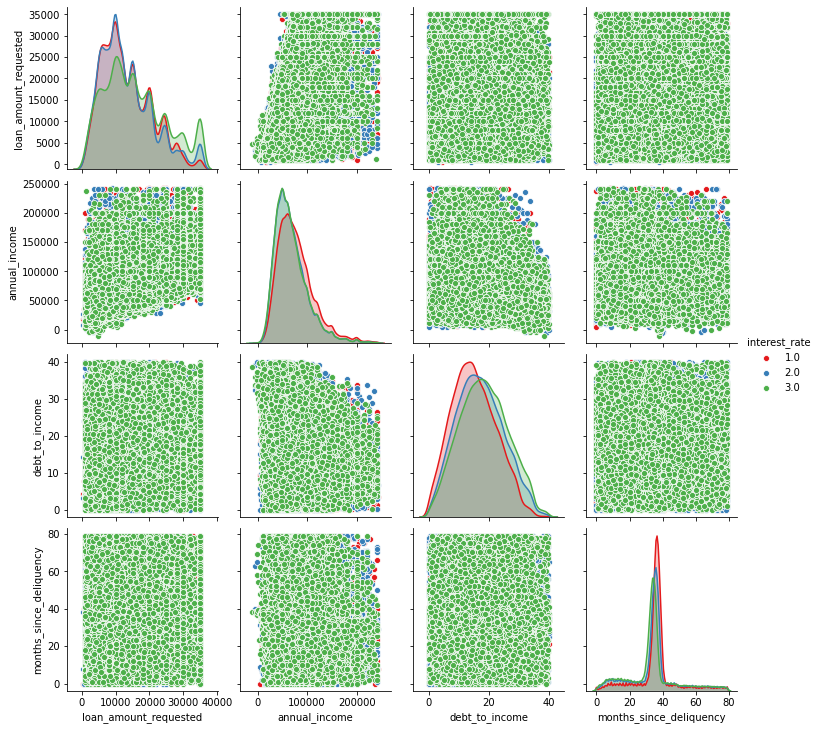

<Figure size 1800x1440 with 0 Axes>

In [ ]:
#

num = train_num[['loan_amount_requested', 'annual_income', 'debt_to_income','months_since_deliquency','interest_rate']]
sns.pairplot(num, hue= 'interest_rate', palette= 'Set1')
plt.figure(figsize=(25,20))

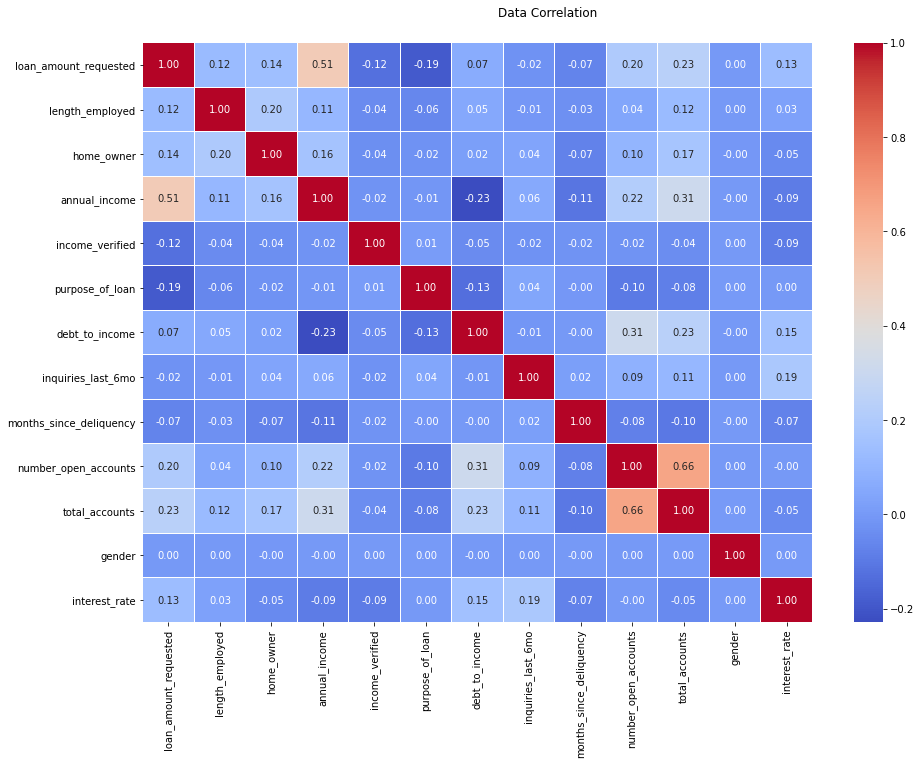

In [ ]:
# create a corelation matrix

cor = f , ax = plt.subplots(figsize = (15,10))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('Data Correlation')


**Observations**
 
 All the variables are not related to our target variable: 

* Number of open accounts, annual income, total accounts had a negative correlation to interest rate.

###Multivariate Analysis

explained_variance_ratio_ =  [0.93259695 0.06740305]


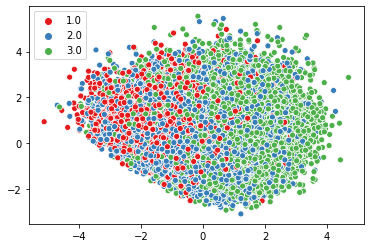

In [ ]:
# We start by dividing our dataset into Features and Targets

y = df.iloc[: ,-1].values
X = df.iloc[:,  : -1].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standarsize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#  Import LDA and feat our data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

x_lda = lda.fit_transform(X_train, y_train)

# Check the variance ratio
print('explained_variance_ratio_ = ' , lda.explained_variance_ratio_)

# plot our LDA graph

sns.scatterplot(x_lda[:,0], x_lda[:, 1], hue=y_train.flatten(), palette='Set1', alpha = 1)

**Observations**

Of the two LDA components, the first component explained 94% of the total variation, and the second one explained the remaining 6%.

explained_variance_ratio_ =  [0.19296949 0.11802767 0.09573501 0.08863717 0.08670308 0.08332867
 0.0798065  0.07400171 0.06584914 0.05744533 0.03044251 0.02705373]


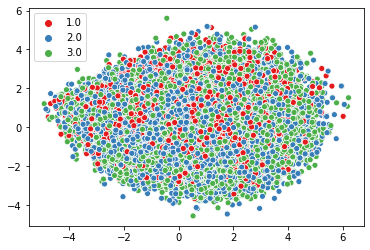

In [ ]:
# We start by dividing our dataset into Features and Targets

y = df.iloc[: ,-1].values
X = df.iloc[:,  : -1].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standarsize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#  Import PCA and feat our data

from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
x_pca = pca.fit_transform(X_train, y_train)

# Check the variance ratio
print('explained_variance_ratio_ = ' , pca.explained_variance_ratio_)

# plot our PCA graph

sns.scatterplot(x_pca[:,0], x_pca[:, 1], hue=y_train.flatten(), palette='Set1', alpha = 1)



**Observations**

We used twelve components with the first component explaining 19% of the total variation.

## Implementing the Solution

### Feature Engineering

#### Multicollinearity check

In [ ]:
# Check for and remove any variables that are colinear

# Focus here is on the independent variables only
independent_variables = df.drop(columns=['interest_rate'])

# Let's display the correlations between the variables
a = independent_variables.corr()
a

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender
loan_amount_requested,1.000000,0.123252,0.141104,0.507854,-0.123362,-0.186447,0.067182,-0.024264,-0.065969,0.202566,0.233436,0.000092
length_employed,0.123252,1.000000,0.196230,0.111363,-0.043586,-0.059980,0.051139,-0.007596,-0.028693,0.042004,0.121804,0.000120
home_owner,0.141104,0.196230,1.000000,0.160190,-0.036582,-0.022967,0.019943,0.035566,-0.074318,0.099012,0.173642,-0.003226
annual_income,0.507854,0.111363,0.160190,1.000000,-0.019998,-0.012530,-0.228774,0.055989,-0.113377,0.215486,0.310745,-0.001829
income_verified,-0.123362,-0.043586,-0.036582,-0.019998,1.000000,0.006795,-0.045911,-0.023815,-0.020317,-0.019921,-0.039231,0.000339
purpose_of_loan,-0.186447,-0.059980,-0.022967,-0.012530,0.006795,1.000000,-0.129031,0.040699,-0.004452,-0.098771,-0.082608,0.001923
debt_to_income,0.067182,0.051139,0.019943,-0.228774,-0.045911,-0.129031,1.000000,-0.008221,-0.000215,0.311267,0.232395,-0.000498
inquiries_last_6mo,-0.024264,-0.007596,0.035566,0.055989,-0.023815,0.040699,-0.008221,1.000000,0.016430,0.087185,0.108638,0.000390
months_since_deliquency,-0.065969,-0.028693,-0.074318,-0.113377,-0.020317,-0.004452,-0.000215,0.016430,1.000000,-0.077478,-0.099323,-0.001250
number_open_accounts,0.202566,0.042004,0.099012,0.215486,-0.019921,-0.098771,0.311267,0.087185,-0.077478,1.000000,0.658510,0.000690


In [ ]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender
loan_amount_requested,1.502752,-0.051763,-0.059482,-0.792838,0.154437,0.228580,-0.230828,0.077498,0.003966,-0.040783,0.009627,-0.002397
length_employed,-0.051763,1.064868,-0.178848,-0.061365,0.027321,0.040792,-0.057209,0.019270,0.003279,0.091063,-0.111493,-0.000769
home_owner,-0.059482,-0.178848,1.082626,-0.079953,0.018412,-0.005945,-0.003383,-0.024542,0.051620,0.025977,-0.135778,0.003708
annual_income,-0.792838,-0.061365,-0.079953,1.700010,-0.059583,-0.100016,0.555169,-0.055672,0.086174,-0.129453,-0.361609,0.004369
income_verified,0.154437,0.027321,0.018412,-0.059583,1.022594,0.025277,0.026106,0.028880,0.026843,-0.026051,0.028762,-0.000467
purpose_of_loan,0.228580,0.040792,-0.005945,-0.100016,0.025277,1.061412,0.078600,-0.036684,0.015834,0.047078,0.018753,-0.002275
debt_to_income,-0.230828,-0.057209,-0.003383,0.555169,0.026106,0.078600,1.308411,0.021223,0.001654,-0.354896,-0.176072,0.002118
inquiries_last_6mo,0.077498,0.019270,-0.024542,-0.055672,0.028880,-0.036684,0.021223,1.022585,-0.031272,-0.043001,-0.091587,-0.000342
months_since_deliquency,0.003966,0.003279,0.051620,0.086174,0.026843,0.015834,0.001654,-0.031272,1.022306,0.022780,0.054842,0.001448
number_open_accounts,-0.040783,0.091063,0.025977,-0.129453,-0.026051,0.047078,-0.354896,-0.043001,0.022780,1.883277,-1.113736,0.000579


In [ ]:
pd.DataFrame(data=np.diag(a), index=a.columns, columns = {'multicollinearity'})


,multicollinearity
loan_amount_requested,1.0
length_employed,1.0
home_owner,1.0
annual_income,1.0
income_verified,1.0
purpose_of_loan,1.0
debt_to_income,1.0
inquiries_last_6mo,1.0
months_since_deliquency,1.0
number_open_accounts,1.0


**Observation**

There are no colinear variables in our dataframe.

#### Residual Plots

In [ ]:
from sklearn.linear_model import LinearRegression

y = df.iloc[: ,-1].values
X = df.iloc[:,  : -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for churning based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# We then describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.001365950365996112

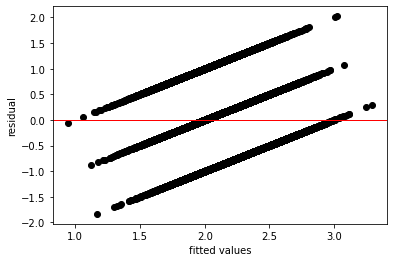

In [ ]:
# Plotting the residuals

import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**Observation**

The residuals plot shows the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate.

In our case above, we see the residuals are not randomly distributed around the horizontal axis hence we'll use a non-linear model. 

#### Heteroskedasticity Test

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Observations**

No patterns can be identified in the data, thus we accept the null hypothesis that the variance is homogeneous across our data.
 

#### Balancing our Dataset

In [ ]:

# We will get the number of records for classes

print("Number of records per class", df['interest_rate'].value_counts())

df_output = df.groupby('interest_rate', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(32413))

# proportion of the non_stratified sample
print(df_output['interest_rate'].value_counts())

# Check the stratified output
print(df_output.head())


Number of records per class 2.0    67339
3.0    56158
1.0    32413
Name: interest_rate, dtype: int64
3.0    32413
2.0    32413
1.0    32413
Name: interest_rate, dtype: int64
        loan_amount_requested  length_employed  home_owner  annual_income  income_verified  purpose_of_loan  debt_to_income  inquiries_last_6mo  months_since_deliquency  number_open_accounts  total_accounts  gender  interest_rate
156584                 4800.0              4.0         2.0   46000.000000              1.0              0.0           22.91                 0.0                45.000000                  13.0            21.0     1.0            1.0
97213                 17000.0             10.0         1.0   79000.000000              1.0              1.0           16.22                 0.0                70.000000                  15.0            41.0     1.0            1.0
163010                23000.0             10.0         1.0   72000.000000              2.0              0.0           11.15             

#### Feature Importance

,0
annual_income,0.266590
total_accounts,0.178181
months_since_deliquency,0.166259
home_owner,0.105700
income_verified,0.079692
number_open_accounts,0.004594
gender,0.001240
purpose_of_loan,-0.017101
length_employed,-0.054963
debt_to_income,-0.221867


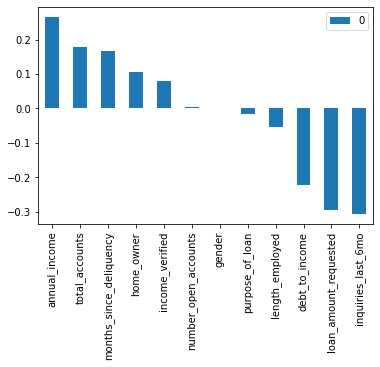

In [ ]:
# We start by dividing our dataset into Features and Targets

y = df_output.iloc[: ,-1]
X = df_output.iloc[:,  : -1]


# Standarsize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(X)


#  Import LDA and feat our data

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

final = lda.fit(x_train, y)

new = pd.DataFrame(index = X.columns.values, data = final.coef_[0].T)
new.sort_values(0, ascending=False).plot(kind = "bar")
new.sort_values(0, ascending=False)

**Observations**

From the above plot, we see that only two variables can contribute significantly to the model; total_accounts and annual_income.

Therefore, we'll use the 2 LDA components for our modelling as the first component explained 94% of the total variation, and the second one explained the remaining 6%. The advantages of these are:

* They will reduce storage space
* Computation time is reduced
* Redundant features are removed
* They allow better visualization

### Modelling

In [ ]:
# We start by dividing our dataset into Features and Targets

X = df_output[['annual_income', 'total_accounts',	'months_since_deliquency',	'home_owner',	'gender']]
y = df_output['interest_rate']

#### Random Forests

In [ ]:
# We start by dividing our dataset into Features and Targets

X = df_output[['annual_income', 'total_accounts',	'months_since_deliquency',	'home_owner',	'gender']].values
y = df_output['interest_rate'].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# standardize our dataset
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train = mn.fit_transform(X_train)
X_test = mn.fit_transform(X_test)


# Import Random Forest Classifier alogorithm
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier()
# We will choose our best parameters using grid search

rand_search = RandomizedSearchCV(estimator= rand, param_distributions={'n_estimators': [100,300,500,700,900],
                        'min_samples_split':[2,4,6,8,10,12,14,16,18,20], 
                        'max_depth': [2,4,6,8,10]},
                      n_jobs=1, cv = 5)

rand_search.fit(X_train, y_train)
print(rand_search.best_params_)


{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 10}


In [ ]:
rand = RandomForestClassifier(n_estimators = 500, min_samples_split = 8, max_depth = 10)
rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

print("Confusion Matrix")

print(confusion_matrix(y_test, y_pred))

print("classification_report")

print(classification_report(y_test, y_pred))

Confusion Matrix
[[6987  741 1971]
 [2109 3941 3573]
 [ 886 1772 7192]]
classification_report
              precision    recall  f1-score   support

         1.0       0.70      0.72      0.71      9699
         2.0       0.61      0.41      0.49      9623
         3.0       0.56      0.73      0.64      9850

    accuracy                           0.62     29172
   macro avg       0.63      0.62      0.61     29172
weighted avg       0.62      0.62      0.61     29172



#### Support Vector Machine

In [ ]:
# We start by dividing our dataset into Features and Targets

X = df_output[['annual_income', 'total_accounts',	'months_since_deliquency',	'home_owner',	'gender']].values
y = df_output['interest_rate'].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# standardize our dataset
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train = mn.fit_transform(X_train)
X_test = mn.fit_transform(X_test)

# Import the SVC Model
from sklearn.svm import SVC

# Instatiate The SVC alogoritm
classifier = SVC()


# Use RandomizedSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001],  
              'kernel': ['linear', 'rbf', 'poly']}  
  
random = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 


# fitting the model for grid search 
random.fit(X_train, y_train) 


# We will choose our best parameters using grid search
# svm_search = GridSearchCV(estimator = classifier, param_grid={
#                                  "kernel" : ["rbf","linear"], 'C':[1, 10]
#                                  }, n_jobs= -1, cv = 3)

# svm_search.fit(X_train, y_train)

# print(svm_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=poly, gamma=0.1, C=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... kernel=poly, gamma=0.1, C=100, score=0.393, total= 1.7min
[CV] kernel=poly, gamma=0.1, C=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV] ....... kernel=poly, gamma=0.1, C=100, score=0.397, total= 1.7min
[CV] kernel=poly, gamma=0.1, C=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] ....... kernel=poly, gamma=0.1, C=100, score=0.388, total= 1.7min
[CV] kernel=poly, gamma=0.1, C=100 ...................................
[CV] ....... kernel=poly, gamma=0.1, C=100, score=0.391, total= 1.7min
[CV] kernel=poly, gamma=0.1, C=100 ...................................
[CV] ....... kernel=poly, gamma=0.1, C=100, score=0.391, total= 1.7min
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.388, total= 1.4min
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.388, total= 1.4min
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.386, total= 1.4min
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] ....... kernel=linear, gamma=1, C=0.1, score=0.387, total= 1.4min
[CV] kernel=linear, gamma=1, C=0.1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 138.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(random.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(random.best_estimator_) 

{'kernel': 'rbf', 'gamma': 1, 'C': 1000}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Import the SVC Model
from sklearn.svm import SVC

classifier = SVC(C = 1000, kernel = 'rbf', gamma = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Confusion Matrix")

print(confusion_matrix(y_test, y_pred))

print("classification_report")

print(classification_report(y_test, y_pred))

Confusion Matrix
[[6047 1789 1863]
 [4203 2080 3340]
 [3637 2023 4190]]
classification_report
              precision    recall  f1-score   support

         1.0       0.44      0.62      0.51      9699
         2.0       0.35      0.22      0.27      9623
         3.0       0.45      0.43      0.44      9850

    accuracy                           0.42     29172
   macro avg       0.41      0.42      0.41     29172
weighted avg       0.41      0.42      0.41     29172



#### KNearest Neighbours

In [ ]:
# We start by dividing our dataset into Features and Targets

X = df_output[['annual_income', 'total_accounts',	'months_since_deliquency',	'home_owner',	'gender']].values
y = df_output['interest_rate'].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# standardize our dataset
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train = mn.fit_transform(X_train)
X_test = mn.fit_transform(X_test)


# Import the Gradient Boosting Model
from sklearn.neighbors import KNeighborsClassifier


# Initialize the Model

neighbor = KNeighborsClassifier()

# Use gridsearch to find the best parameters

neighbor_search = GridSearchCV(neighbor, param_grid = {'n_neighbors': np.arange(3,11), 
                                       'metric' : ['minkowski','eucledian', 'cosine']}, cv = 5, n_jobs=1)

neighbor_search.fit(X_train, y_train)

print(neighbor_search.best_params_)




{'metric': 'minkowski', 'n_neighbors': 10}


In [ ]:
neighbor = KNeighborsClassifier( metric = 'minkowski',  n_neighbors = 10)
neighbor.fit(X_train, y_train)

y_pred = neighbor.predict(X_test)

print("Confusion Matrix")

print(confusion_matrix(y_test, y_pred))

print("classification_report")

print(classification_report(y_test, y_pred))

Confusion Matrix
[[7052 1534 1113]
 [3047 4491 2085]
 [1670 3332 4848]]
classification_report
              precision    recall  f1-score   support

         1.0       0.60      0.73      0.66      9699
         2.0       0.48      0.47      0.47      9623
         3.0       0.60      0.49      0.54      9850

    accuracy                           0.56     29172
   macro avg       0.56      0.56      0.56     29172
weighted avg       0.56      0.56      0.56     29172



#### Naive Bayes

In [ ]:
# We start by dividing our dataset into Features and Targets

X = df_output[['annual_income', 'total_accounts',	'months_since_deliquency',	'home_owner',	'gender']].values
y = df_output['interest_rate'].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

# standardize our dataset
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
X_train = mn.fit_transform(X_train)
X_test = mn.fit_transform(X_test)


# Import the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Instatiate The Naive Bayes alogoritm
model = GaussianNB()

# Use GridSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'var_smoothing': [0.01, 0.0001, 0.000001, 1e-09]}  
  
grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.408, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.406, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.403, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.398, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.407, total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV] ................ var_smoothing=0.0001, score=0.406, total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ var_smoothing=0.0001, score=0.398, total=   0.0s
[CV] var_smoothing=0.0001 ............................................
[CV] ................ var_smoothing=0.0001, score=0.406, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.406, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.405, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.404, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.398, total=   0.0s
[CV] var_smoothing=1e-06 .............................................
[CV] ................. var_smoothing=1e-06, score=0.406, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.0001, 1e-06, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'var_smoothing': 0.01}
GaussianNB(priors=None, var_smoothing=0.01)


In [ ]:
model = GaussianNB(var_smoothing = 0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix")

print(confusion_matrix(y_test, y_pred))

print("classification_report")

print(classification_report(y_test, y_pred))

Confusion Matrix
[[5154 2969 1576]
 [3609 3354 2660]
 [3324 3379 3147]]
classification_report
              precision    recall  f1-score   support

         1.0       0.43      0.53      0.47      9699
         2.0       0.35      0.35      0.35      9623
         3.0       0.43      0.32      0.37      9850

    accuracy                           0.40     29172
   macro avg       0.40      0.40      0.40     29172
weighted avg       0.40      0.40      0.40     29172

